<a href="https://colab.research.google.com/github/MarkLukyanov/online_shoppers_purchasing_intention/blob/main/Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Download, Overview, Import of the Libraries

We will now build a model that will predict from the behavioural features of a customer, whether he will buy anything or not.
The model's learning process will be based on [this](https://raw.githubusercontent.com/MarkLukyanov/online_shoppers_purchsing_intention/main/customers_clean.csv) dataset.

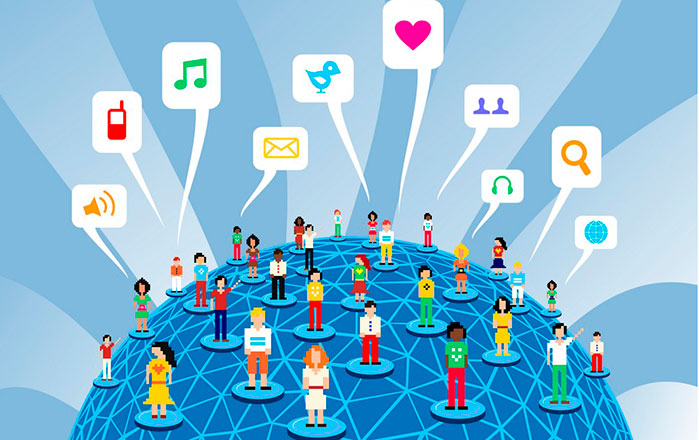

* `Administrative`, `Administrative_Duration`, `Informational`, `Informational_Duration`, `Product_Related`, `Product_Related_Duration` - number of different types of pages visited by the visitor and total time spent in each of these page categories
* `BounceRates` - percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session
* `ExitRates` - all pageviews to the page, the percentage that were the last in the session
* `PageValues` - the average value for a web page that a user visited before completing an e-commerce transaction
* `SpecialDay` - the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction
* `Month` - month of the year
* `OperatingSystems` - OS of the user
* `Browser` - type of the user's browser
* `Region` - type of the user's region
* `TrafficType` - traffic type
* `VisitorType` - type of the visitor(returning or new)
* `Weekend` - whether the date of the visit is weekend
* `Revenue` - whether the user ended up with shopping or not

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/MarkLukyanov/online_shoppers_purchsing_intention/main/customers_clean.csv")

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.shape

(12221, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12221 entries, 0 to 12220
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12221 non-null  int64  
 1   Administrative_Duration  12221 non-null  float64
 2   Informational            12221 non-null  int64  
 3   Informational_Duration   12221 non-null  float64
 4   ProductRelated           12221 non-null  int64  
 5   ProductRelated_Duration  12221 non-null  float64
 6   BounceRates              12221 non-null  float64
 7   ExitRates                12221 non-null  float64
 8   PageValues               12221 non-null  float64
 9   SpecialDay               12221 non-null  float64
 10  Month                    12221 non-null  object 
 11  OperatingSystems         12221 non-null  int64  
 12  Browser                  12221 non-null  int64  
 13  Region                   12221 non-null  int64  
 14  TrafficType           

# Machine Learning

We will solve a Classification problem using the k-nearest neighbors(kNN) algorithm and the Naive Bayes Classifier, comparing these approaches.

## Numerical Features, Default Parameters

Let's first try to make predictions using numerical features and default parameters only.

In [ ]:
X = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14]]
y = (df.Revenue == True).astype(int)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12221 entries, 0 to 12220
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12221 non-null  int64  
 1   Administrative_Duration  12221 non-null  float64
 2   Informational            12221 non-null  int64  
 3   Informational_Duration   12221 non-null  float64
 4   ProductRelated           12221 non-null  int64  
 5   ProductRelated_Duration  12221 non-null  float64
 6   BounceRates              12221 non-null  float64
 7   ExitRates                12221 non-null  float64
 8   PageValues               12221 non-null  float64
 9   SpecialDay               12221 non-null  float64
 10  OperatingSystems         12221 non-null  int64  
 11  Browser                  12221 non-null  int64  
 12  Region                   12221 non-null  int64  
 13  TrafficType              12221 non-null  int64  
dtypes: float64(7), int64(7

In [ ]:
y.value_counts() # 0 stands for customers that did not buy anything

0    10313
1     1908
Name: Revenue, dtype: int64

First of all, we need to split the data

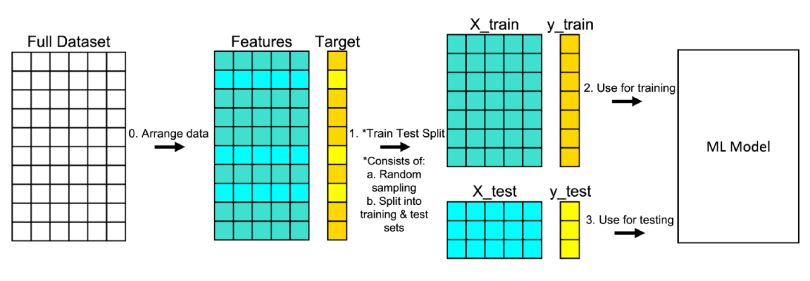

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((9165, 14), (3056, 14))

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_cl = KNeighborsClassifier()
knn_cl.fit(X_train_scaled, y_train)
pred_knn = knn_cl.predict(X_test_scaled)

We cannot use the accuracy metric here, because there is a big difference between the amounts of positive and negative class members, which means that they are disbalanced. Moreover, for us both false-positive and false-negative values are equally bad. So, we will use ROC-AUC score as a target metric.

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred) # Bayes accuracy

0.7114856530625108

In [ ]:
roc_auc_score(y_test, pred_knn) # kNN accuracy

0.6130169697951887

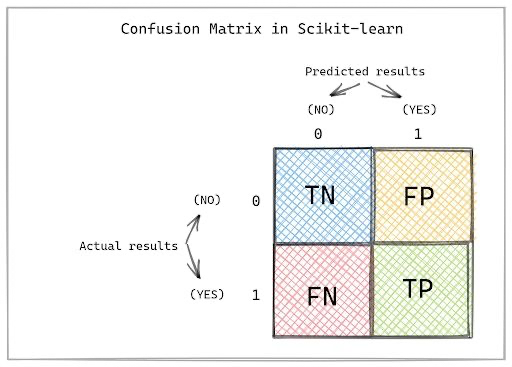

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred) # Bayes

array([[2354,  229],
       [ 231,  242]])

The model predicted about 229 buyers, who had not ended up with buying, that they had. And about 231 buyers that had shopped - that they hadn't.

In [ ]:
confusion_matrix(y_test, pred_knn) # kNN

array([[2517,   66],
       [ 354,  119]])

The model predicted about 66 buyers, who had not ended up with buying, that they had. And about 354 buyers that had shopped - that they hadn't.

Our aim is to balance between False-Positives and False-Negatives, because we do not want our expectations neither to be highly surpassed, nor not to be met at all.

From this point of view, it is obvious that the Naive Bayes Classifier works better than the k-nearest Neighbors Classifier.

## Numerical Features, Hyperparameters

Now we will improve the accuracies of our models by picking hyperparameters, using Grid Search.

### KNN

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = KNeighborsClassifier()

params = {'n_neighbors' : np.arange(2, 30, 2),
          'weights' : ['uniform', 'distance'],
          'p' : [1, 2, 3]}

gs_knn = GridSearchCV(model, params, scoring='roc_auc', cv=4, n_jobs=-1, verbose=3)
gs_knn.fit(X_train, y_train)

Fitting 4 folds for each of 84 candidates, totalling 336 fits


GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=3)

In [ ]:
gs_knn.best_score_, gs_knn.best_params_

(0.817669004180211, {'n_neighbors': 28, 'p': 1, 'weights': 'distance'})

So the best model must have 28 neighbors, all points must be weighted by the inverse of their distance and we need to determine manhattan distance.

In [ ]:
pred_knn = gs_knn.best_estimator_.predict(X_test)

roc_auc_score(y_test, pred_knn)

0.5482235039807359

In [ ]:
confusion_matrix(y_test, pred_knn)

array([[2570,   13],
       [ 425,   48]])

We can see that both metrics were slightly improved

### Bayes

In [ ]:

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.25, random_state=42)

model = GaussianNB()

params = {
            'priors': [None, [0.5,]* 2,],
            'var_smoothing': [1e-9, 1e-6, 1e-12]
          }

gs_b_1 = GridSearchCV(model, params, scoring='roc_auc', cv=4, n_jobs=-1, verbose=3)
gs_b_1.fit(X_train_1, y_train_1)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


GridSearchCV(cv=4, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None, [0.5, 0.5]],
                         'var_smoothing': [1e-09, 1e-06, 1e-12]},
             scoring='roc_auc', verbose=3)

In [ ]:
gs_b_1.best_score_, gs_b_1.best_params_

(0.8519354598996656, {'priors': None, 'var_smoothing': 1e-06})

In the best model we do not need to set any prior probabilities and the variance must be 0.000001

In [ ]:
pred_b_1 = gs_b_1.best_estimator_.predict(X_test_1)

roc_auc_score(y_test_1, pred_b_1)

0.6923554481694016

In [ ]:
confusion_matrix(y_test_1, pred_b_1)

array([[2419,  164],
       [ 261,  212]])

The Naive Bayes model is still better than KNN and it has improved more than the KNN.

## Numerical & Categorical Features, Hyperparameters

Let's take the best model and add categorical features to it. We'll do it using One-Hot encoding.

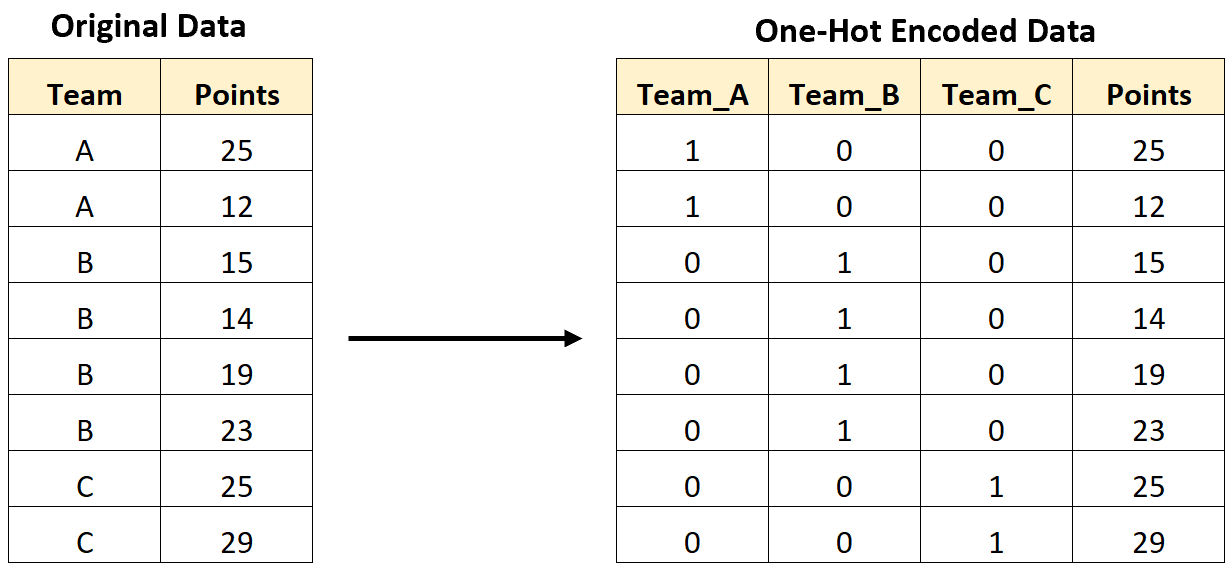

In [ ]:
X_full = df.drop('Revenue', axis=1)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.25, random_state=42)

In [ ]:
X_train_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9165 entries, 2138 to 7270
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9165 non-null   int64  
 1   Administrative_Duration  9165 non-null   float64
 2   Informational            9165 non-null   int64  
 3   Informational_Duration   9165 non-null   float64
 4   ProductRelated           9165 non-null   int64  
 5   ProductRelated_Duration  9165 non-null   float64
 6   BounceRates              9165 non-null   float64
 7   ExitRates                9165 non-null   float64
 8   PageValues               9165 non-null   float64
 9   SpecialDay               9165 non-null   float64
 10  Month                    9165 non-null   object 
 11  OperatingSystems         9165 non-null   int64  
 12  Browser                  9165 non-null   int64  
 13  Region                   9165 non-null   int64  
 14  TrafficType          

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

categorical = ['Month', 'VisitorType', 'Weekend']
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational',
                    "Informational_Duration", "ProductRelated", "ProductRelated_Duration",
                    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems',
                    'Browser', 'Region', 'TrafficType']

ct = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = ct.fit_transform(X_train_full)
X_test_transformed = ct.transform(X_test_full)

In [ ]:
X_train_transformed

array([[0.        , 0.        , 0.        , ..., 0.08333333, 0.125     ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.08333333, 0.25      ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05263158],
       ...,
       [0.        , 0.        , 0.        , ..., 0.08333333, 0.        ,
        0.15789474],
       [0.        , 0.        , 0.        , ..., 0.08333333, 0.25      ,
        0.47368421],
       [1.        , 0.        , 0.        , ..., 0.08333333, 0.        ,
        0.10526316]])

However, now we have a numpy array. Let's make it a pandas dataframe again.

In [ ]:
new_features = list(ct.named_transformers_['ohe'].get_feature_names_out())
new_features.extend(numeric_features)

new_features

['Month_Aug',
 'Month_Dec',
 'Month_Feb',
 'Month_Jul',
 'Month_June',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'Month_aug',
 'VisitorType_New_Visitor',
 'VisitorType_Other',
 'VisitorType_Returning_Visitor',
 'Weekend_False',
 'Weekend_True',
 'Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

In [ ]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=new_features)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=new_features)

X_train_transformed.head()

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,...,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.034043,0.009345,0.041667,0.104167,0.000000,0.4,0.142857,0.083333,0.125,0.000000
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.076596,0.018928,0.027273,0.043357,0.000000,0.0,0.142857,0.083333,0.250,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.029787,0.032525,0.059524,0.225962,0.056461,0.0,0.000000,0.000000,0.000,0.052632
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.039716,0.014886,0.000000,0.066667,0.144363,0.0,0.142857,0.083333,0.000,0.052632
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.068085,0.023152,0.018868,0.040881,0.000000,0.0,0.142857,0.250000,0.375,0.000000


And now we train the models on the full data, including categories and booleans.

### KNN

In [ ]:
model = KNeighborsClassifier()

params = {'n_neighbors' : np.arange(2, 30),
          'weights' : ['uniform', 'distance'],
          'p' : [1, 2]}

gs_knn = GridSearchCV(model, params, scoring='roc_auc', cv=4, n_jobs=-1, verbose=3)
gs_knn.fit(X_train_transformed, y_train_full)

Fitting 4 folds for each of 112 candidates, totalling 448 fits


GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=3)

In [ ]:
gs_knn.best_score_, gs_knn.best_params_

(0.7949966686100014, {'n_neighbors': 27, 'p': 1, 'weights': 'distance'})

In [ ]:
pred_knn = gs_knn.best_estimator_.predict(X_test_transformed)

roc_auc_score(y_test_full, pred_knn)

0.5271862126655092

In [ ]:
confusion_matrix(y_test_full, pred_knn)

array([[2576,    7],
       [ 446,   27]])

### Bayes

In [ ]:

model = GaussianNB()

params = {
            'priors': [None, [0.5,]* 2,],
            'var_smoothing': [1e-9, 1e-6, 1e-12]
          }

gs_b = GridSearchCV(model, params, scoring='roc_auc', cv=4, n_jobs=-1, verbose=3)
gs_b.fit(X_train_transformed, y_train_full)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


GridSearchCV(cv=4, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None, [0.5, 0.5]],
                         'var_smoothing': [1e-09, 1e-06, 1e-12]},
             scoring='roc_auc', verbose=3)

In [ ]:
gs_b.best_score_, gs_b.best_params_

(0.8130545363319577, {'priors': [0.5, 0.5], 'var_smoothing': 1e-12})

In [ ]:
pred_b = gs_b.best_estimator_.predict(X_test_transformed)

roc_auc_score(y_test_full, pred_b)

0.721127898382578

In [ ]:
confusion_matrix(y_test_full, pred_b)

array([[1470, 1113],
       [  60,  413]])

As we can see from the confusion matrices, the KNN model works better, so we pick it.

## Explainer Dashboard

Now we will make a dashboard that will give us lots of specific indormation about the model.

### Building

In [ ]:
!pip install explainerdashboard -q

In [ ]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

In [ ]:
explainer = ClassifierExplainer(gs_knn.best_estimator_, X_test_transformed.iloc[:20], y_test_full.iloc[:20])

Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


In [ ]:
db = ExplainerDashboard(explainer)

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:538: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



  0%|          | 0/20 [00:00<?, ?it/s]

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


In [ ]:
db.run()

Starting ExplainerDashboard on http://172.28.0.12:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)


<IPython.core.display.Javascript object>

Dash app running on:


<IPython.core.display.Javascript object>

### Analysis

* According to the permutations importance method, the most important features are 'Page values' and 'Exit rates'

* If we look at the customer with index 0, it can be seen that the probability that he would buy anything was tremendously decreased by ExitRates - 5.18% and BounceRates - 3.06%, whereas the average(the starting point) is about 15%.

* Consider customer with index 12: the chances of him to buy something were highly increased by PageValues - 19% and ExitRates - 5.88%.

* If we look at the metrics, counted at these first 20 elements, we can see that:
  Accuracy(the number of correct predictions to the total number of predictions) is 90%, which means that the model mistook only at 2 predictions out of 20.

  Precision is 100%, which means that it predicted correctly all the positives.

  ROC-AUC score is 96%, which means that the quality of predictions of the model without considering the classification threshold is almost ideal.

  The log_loss is 23%, which means that in average it is calculates the probabilities of each class with the accuracy of 77%.